# Analysis of the experimental results

In [2]:
import pandas as pd
import os

In [3]:
## combine all results
models = ["AlexNet", "DenseNet", "ShuffleNetV2", "VisionTransformer","ConvNeXt"]
frequencies = [16, 32, 64, 128]
dt_result_full = pd.DataFrame(columns=["Model", "Frequency", "Batch Size",  "Average Power(W)",     "Time(s)",     "Energy(J)", "Average Wait Time(s)",  "Max Wait Time(s)"  ,"Average Peak Power (W)"])
for model in models:
    for frequency in frequencies:
        file_path = os.path.join("results", str(model) + "_f" + str(frequency))
        df_set = pd.read_csv(file_path)
        df_set["Model"] = [str(model)]*5
        df_set["Frequency"] = [frequency]*5
        dt_result_full = pd.concat([dt_result_full, df_set], ignore_index=True)
#dt_result_full.replace("")
#print(dt_result_full)


In [4]:
# Replacing Greedy tags
dt_result_full.loc[dt_result_full["Batch Size"].str.contains("Greedy"), "Batch Size"] = -1

In [5]:
dt_result_full['Batch Size'] = dt_result_full['Batch Size'].astype('int64')
dt_result_full

,Model,Frequency,Batch Size,Average Power(W),Time(s),Energy(J),Average Wait Time(s),Max Wait Time(s),Average Peak Power (W)
0,AlexNet,16,32,62.509730,514.438858,32157.434147,1.098920,2.209982,NaN
1,AlexNet,16,64,62.445952,515.227148,32173.849953,2.234832,4.468260,NaN
2,AlexNet,16,16,62.965897,514.655780,32405.763017,0.534757,1.095117,NaN
3,AlexNet,16,-1,63.764950,515.010931,32839.646358,0.005808,0.137334,NaN
4,AlexNet,16,128,62.604892,514.399832,32203.946145,4.487377,8.831160,NaN
...,...,...,...,...,...,...,...,...,...
95,ConvNeXt,128,32,115.883207,65.060066,7539.369098,0.253975,0.504290,116.457496
96,ConvNeXt,128,128,124.147715,65.501149,8131.818013,1.019602,1.951601,126.116729
97,ConvNeXt,128,-1,122.778615,64.914582,7970.122506,0.023632,0.226199,123.131999
98,ConvNeXt,128,16,118.820856,65.148526,7741.003594,0.130832,0.261268,119.192879


In [6]:
analysed_results = pd.DataFrame(columns=["Model", "Energy", "MaxWaitTime", "BatchSize", "Frequency"])

batch_sizes = [-1, 16, 32, 64, 128]


for model in models:
    for frequency in frequencies:
        for batch_size in batch_sizes:
            #print(batch_size)
            dt_temp = dt_result_full.query("Model == @model and `Frequency` == @frequency and `Batch Size` == @batch_size") 
            if dt_temp.empty is False:
                #print(dt_temp["Energy(J)"])
                e_img = dt_temp["Energy(J)"].loc[dt_temp.index[0]]/8192
                max_wait = -1*dt_temp["Max Wait Time(s)"].loc[dt_temp.index[0]]
                analysed_results.loc[len(analysed_results.index)] = [model, e_img, max_wait, batch_size, frequency]
analysed_results



,Model,Energy,MaxWaitTime,BatchSize,Frequency
0,AlexNet,4.008746,-0.137334,-1,16
1,AlexNet,3.955782,-1.095117,16,16
2,AlexNet,3.925468,-2.209982,32,16
3,AlexNet,3.927472,-4.468260,64,16
4,AlexNet,3.931146,-8.831160,128,16
...,...,...,...,...,...
95,ConvNeXt,0.972915,-0.226199,-1,128
96,ConvNeXt,0.944947,-0.261268,16,128
97,ConvNeXt,0.920333,-0.504290,32,128
98,ConvNeXt,0.907099,-0.983771,64,128


In [7]:
analysed_results_energy_freq = pd.DataFrame(columns=["Model", "Frequency", "Energy"])
for model in models:
    for frequency in frequencies:
        ener = analysed_results.query("Model == @model and `Frequency` == @frequency").loc[:, 'Energy'].mean()
        analysed_results_energy_freq.loc[len(analysed_results_energy_freq.index)] = [model, frequency, ener]
analysed_results_energy_freq

,Model,Frequency,Energy
0,AlexNet,16,3.949723
1,AlexNet,32,1.994054
2,AlexNet,64,1.016751
3,AlexNet,128,0.520768
4,DenseNet,16,4.044834
5,DenseNet,32,2.079871
6,DenseNet,64,1.095732
7,DenseNet,128,0.585928
8,ShuffleNetV2,16,4.002112
9,ShuffleNetV2,32,1.983438


In [8]:
data_plot= {}
for frequency in frequencies:
    data_plot[frequency] = []
    for model in models:
        tp = analysed_results_energy_freq.query("Model == @model and `Frequency` == @frequency")["Energy"]
        energy_val = tp.loc[tp.index[0]]
        data_plot[frequency].append(energy_val)

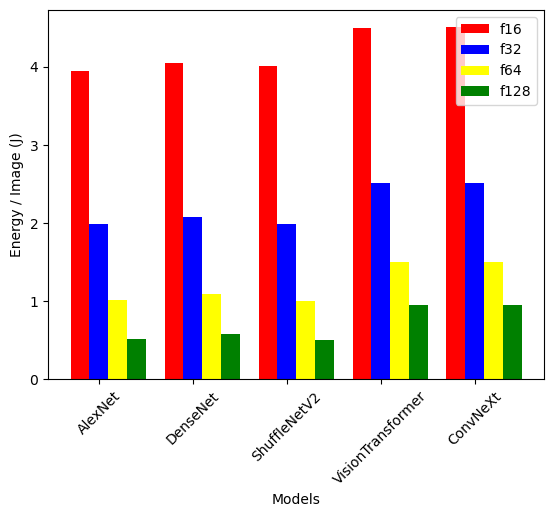

In [10]:
import numpy as np  
import matplotlib.pyplot as plt 

X = models 
f16 = data_plot[16] 
f32 = data_plot[32]
f64 = data_plot[64]
f128 = data_plot[128]


X_axis = np.arange(len(X)) 
  
plt.bar(X_axis - 0.2, f16, 0.2, label = 'f16', color="red") 
plt.bar(X_axis + 0.0, f32, 0.2, label = 'f32', color="blue") 
plt.bar(X_axis + 0.2, f64, 0.2, label = 'f64', color="yellow") 
plt.bar(X_axis + 0.4, f128, 0.2, label = 'f128', color="green") 
  
plt.xticks(X_axis, X) 
plt.xlabel("Models") 
plt.ylabel("Energy / Image (J)") 
plt.xticks(rotation=45)
#plt.title("") 
#plt.legend(loc='upper left')
plt.legend() 
plt.show()



In [17]:
analysed_results_energy_freq.columns = analysed_results_energy_freq.iloc[1]

In [18]:
analysed_results_energy_freq

1,AlexNet,32,1.9940542431220631
0,AlexNet,16,3.949723
1,AlexNet,32,1.994054
2,AlexNet,64,1.016751
3,AlexNet,128,0.520768
4,ConvNeXt,16,4.501467
5,ConvNeXt,32,2.516069
6,ConvNeXt,64,1.498970
7,ConvNeXt,128,0.947590
8,DenseNet,16,4.044834
9,DenseNet,32,2.079871


In [23]:
analysed_results_energy_freq.set_index('Model', inplace=True)

In [24]:
analysed_results_energy_freq

,Frequency,Energy
Model,,
AlexNet,16,3.949723
AlexNet,32,1.994054
AlexNet,64,1.016751
AlexNet,128,0.520768
ConvNeXt,16,4.501467
ConvNeXt,32,2.516069
ConvNeXt,64,1.498970
ConvNeXt,128,0.947590
DenseNet,16,4.044834


<AxesSubplot:xlabel='Model'>

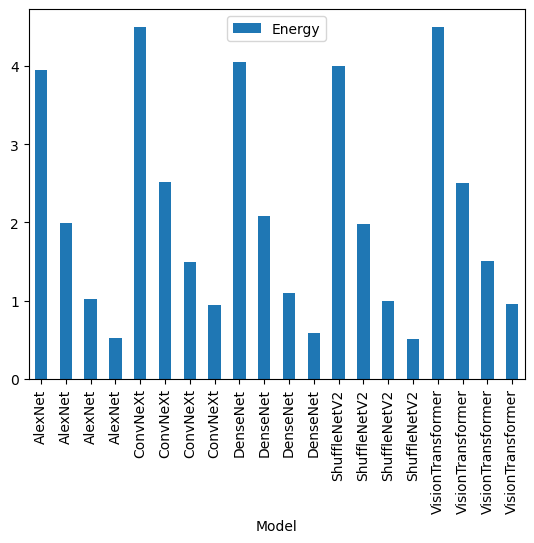

In [25]:
analysed_results_energy_freq.plot.bar(y="Energy")

In [45]:
dt_result_full

,Model,Frequency,Batch Size,Average Power(W),Time(s),Energy(J),Average Wait Time(s),Max Wait Time(s),Average Peak Power (W)
0,AlexNet,16,32,62.509730,514.438858,32157.434147,1.098920,2.209982,NaN
1,AlexNet,16,64,62.445952,515.227148,32173.849953,2.234832,4.468260,NaN
2,AlexNet,16,16,62.965897,514.655780,32405.763017,0.534757,1.095117,NaN
3,AlexNet,16,-1,63.764950,515.010931,32839.646358,0.005808,0.137334,NaN
4,AlexNet,16,128,62.604892,514.399832,32203.946145,4.487377,8.831160,NaN
...,...,...,...,...,...,...,...,...,...
95,VisionTransformer,128,128,119.547889,65.648903,7848.187836,1.013010,1.893154,121.340411
96,VisionTransformer,128,32,115.734069,65.224316,7548.675435,0.249621,0.495514,116.304151
97,VisionTransformer,128,-1,137.868578,64.894412,8946.900224,0.007724,0.213341,138.355627
98,VisionTransformer,128,64,112.447878,65.298676,7342.697529,0.509713,0.962851,113.344588
